In [4]:
from datasets import load_dataset
import re
import pprint
from itertools import chain
from collections import OrderedDict
from src.data_processing import get_category_tags, get_category_label, get_tag_dict

In [2]:
ds_raw_train = load_dataset("TimSchopf/arxiv_categories", "default", split="train")
ds_cats = load_dataset("TimSchopf/arxiv_categories",  "arxiv_category_descriptions",
                       split="arxiv_category_descriptions")

In [3]:
pprint.pprint(ds_raw_train[0:2])
pprint.pprint(ds_cats[0:2])

{'abstract': ['In order to read meter values from a camera on an autonomous '
              'inspection robot with positional errors, it is necessary to '
              'detect meter regions from the image. In this study, we '
              'developed shape-based, texture-based, and background '
              'information-based methods as meter area detection techniques '
              'and compared their effectiveness for meters of different shapes '
              'and sizes. As a result, we confirmed that the background '
              'information-based method can detect the farthest meters '
              'regardless of the shape and number of meters, and can stably '
              'detect meters with a diameter of 40px.',
              'We consider the problem of finding the transition rates of a '
              'continuous-time homogeneous Markov chain under the empirical '
              'condition that the state changes at most once during a time '
              'interval of uni

## Structure of data
Two different Dataset objects 
1. "default" which contains the follwoign relevant features for our problem:
    - title,abstract, categories
   
2. "arxiv_category_description" which contains features that only describe each category
    - tag, name

Therefore, We will need the 'tag' feature of the second dataset to identify all the categories
available in this dataset and then map that to information in the 'categories' feature of
the identify the category specific to that datapoint

**NOTE** - there maybe multiple "tags" within the "categories" field for a given paper, 
since a paper coudl actually belong to multiple category. But perhaps, its best to label
each paper based on the first "tag" encountered in "categories".

In [6]:
all_tags = get_tag_dict(ds_cats)
pprint.pprint(all_tags) # Let's take a look at all the category tags

OrderedDict([(0, 'cs.AI'),
             (1, 'cs.AR'),
             (2, 'cs.CC'),
             (3, 'cs.CE'),
             (4, 'cs.CG'),
             (5, 'cs.CL'),
             (6, 'cs.CR'),
             (7, 'cs.CV'),
             (8, 'cs.CY'),
             (9, 'cs.DB'),
             (10, 'cs.DC'),
             (11, 'cs.DL'),
             (12, 'cs.DM'),
             (13, 'cs.DS'),
             (14, 'cs.ET'),
             (15, 'cs.FL'),
             (16, 'cs.GL'),
             (17, 'cs.GR'),
             (18, 'cs.GT'),
             (19, 'cs.HC'),
             (20, 'cs.IR'),
             (21, 'cs.IT'),
             (22, 'cs.LG'),
             (23, 'cs.LO'),
             (24, 'cs.MA'),
             (25, 'cs.MM'),
             (26, 'cs.MS'),
             (27, 'cs.NA'),
             (28, 'cs.NE'),
             (29, 'cs.NI'),
             (30, 'cs.OH'),
             (31, 'cs.OS'),
             (32, 'cs.PF'),
             (33, 'cs.PL'),
             (34, 'cs.RO'),
             (35, 'cs.SC'),
  

In [ ]:
ds_raw_train[:30]['categories'] # Take a look at the categories field in the raw tranining set

[['Computer Science Archive->cs.CV'],
 ['Mathematics Archive->math.PR'],
 ['Physics Archive->astro-ph->astro-ph.EP'],
 ['Computer Science Archive->cs.DB'],
 ['Physics Archive->nlin->nlin.CD'],
 ['Physics Archive->astro-ph->astro-ph.SR'],
 ['Physics Archive->physics->physics.atom-ph'],
 ['Computer Science Archive->cs.CV', 'Computer Science Archive->cs.LG'],
 ['Physics Archive->astro-ph->astro-ph.GA',
  'Physics Archive->astro-ph->astro-ph.SR'],
 ['Mathematics Archive->math.OC'],
 ['Physics Archive->astro-ph->astro-ph.GA',
  'Physics Archive->astro-ph->astro-ph.SR'],
 ['Mathematics Archive->math.PR'],
 ['Physics Archive->cond-mat->cond-mat.mtrl-sci'],
 ['Mathematics Archive->math.AP'],
 ['Physics Archive->gr-qc',
  'Physics Archive->hep->hep-th',
  'Physics Archive->quant-ph'],
 ['Physics Archive->gr-qc', 'Physics Archive->hep->hep-th'],
 ['Computer Science Archive->cs.CC'],
 ['Physics Archive->gr-qc'],
 ['Mathematics Archive->math.AT'],
 ['Physics Archive->astro-ph->astro-ph.GA',
  'Phy

## Pattern matching strategy

1. The category field in the datast may contain 1 or more categories. Therefore, we need
   to process each of these

2. The pattern to match i.e the thing that appears in the tags always appears after a -> 
   , and is either flanked by another -> or a white space?

3. Therefore, we will need a function that extracts the parts of the 'categories' string 
   that has the following pattern : ->x-> or ->x. This function will need to be applied
   to each category for a specific datapoint.  

4. **Always** the first -> appears after the word 'Archive'

In [8]:
ds_raw_train = ds_raw_train.map(lambda x: get_category_tags(x, all_tags))

Map: 100%|██████████| 163168/163168 [00:10<00:00, 15652.83 examples/s]


In [9]:
ds_raw_train = ds_raw_train.map(lambda x: get_category_label(x, all_tags))

Map: 100%|██████████| 163168/163168 [00:11<00:00, 13710.35 examples/s]


In [ ]:
ds_raw_train[96537] # Looking good

{'id': '1810.10573',
 'title': 'Thermodynamics and phase diagrams of Polyakov-loop extended chiral models',
 'abstract': 'We study the thermodynamics and phase diagrams of two-flavor quantum chromodynamics using the Polyakov-loop extended quark-meson (PQM) model and the Pisarski-Skokov chiral matrix ($\\chi M$) model. At temperatures up to $T\\approx2T_c$ and baryon chemical potentials up to $\\mu_B=400\\ \\rm{MeV}$, both models show reasonable agreement with the pressure, energy density, and interaction measure as calculated on the lattice. The Polyakov loop is found to rise significantly faster with temperature in models than on the lattice. In the low-temperature and high baryon density regime, the two models predict different states of matter; The PQM model predicts a confined and chirally restored phase, while the $\\chi M$ model predicts a deconfined and chirally restored phase. At finite isospin density and zero baryon density, the onset of pion condensation at $T=0$ is at $\\mu

In [ ]:
ds_raw_train.features

{'id': Value('string'),
 'title': Value('string'),
 'abstract': Value('string'),
 'categories': List(Value('string')),
 'creation_date': Value('timestamp[ns, tz=UTC]'),
 'category': Value('string'),
 'label': List(Value('int64'))}

In [36]:
def get_category_dist(ds, all_tags):
    category_counts = dict()
    for k , v in all_tags.items():
        category_counts[v] = ds.filter(lambda x: x["label"] == [k]).num_rows
    return category_counts
category_counts = get_category_dist(ds_raw_train, all_tags)

Filter: 100%|██████████| 163168/163168 [00:02<00:00, 67755.90 examples/s]


Text(0.5, 0, 'category labels')

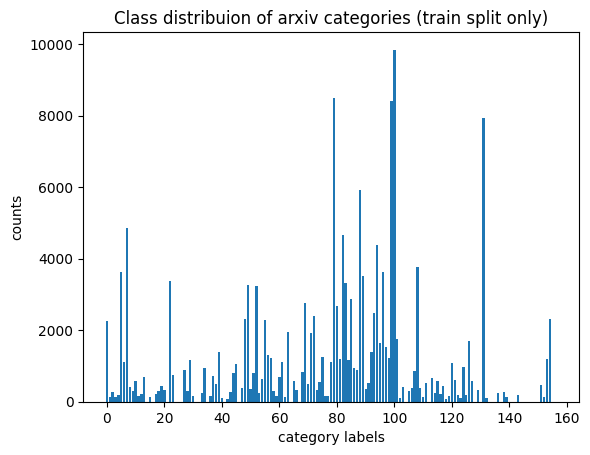

In [39]:
import matplotlib.pyplot as plt
plt.bar(range(len(category_counts)), category_counts.values())
plt.title('Class distribuion of arxiv categories (train split only)')
plt.ylabel('counts')
plt.xlabel('category labels')